In [5]:
import dynamo as dyn
import pandas as pd
import matplotlib.pyplot as plt
import dynamo as dyn
import seaborn as sns
import anndata as Anndata
from typing import Dict, List, Any, Tuple
from pandas import DataFrame
dyn.dynamo_logger.main_silence()
import warnings
warnings.filterwarnings('ignore')

In [6]:
adata: Anndata = dyn.read("data/H48_Label_dyn.h5ad")
adata

AnnData object with n_obs × n_vars = 6387 × 21522
    var: 'gene_name'
    layers: 'X_l_TC', 'X_n_TC', 'ambiguous', 'labeled_TC', 'sl_TC', 'sn_TC', 'spliced', 'total', 'ul_TC', 'un_TC', 'unlabeled_TC', 'unspliced'

In [7]:
adata.var

gene_name
gene_id                           
ENSDARG00000000001         slc35a5
ENSDARG00000000002          ccdc80
ENSDARG00000000018            nrf1
ENSDARG00000000019           ube2h
ENSDARG00000000068       slc9a3r1a
...                            ...
ENSDARG00000117814  CABZ01063971.1
ENSDARG00000117816  CABZ01078767.1
ENSDARG00000117818      CR926130.2
ENSDARG00000117821      BX323593.1
ENSDARG00000117824  CABZ01064670.1

[21522 rows x 1 columns]

In [9]:
dyn.pp.convert2symbol(adata, scopes=['ensemblgene', 'symbol'], subset=True)

|-----> convert ensemble name to official gene name
|-----? Your adata object uses non-official gene names as gene index. 
Dynamo is converting those names to official gene names.
Error: The requests_cache python module is required to use request caching.
See - https://requests-cache.readthedocs.io/en/latest/user_guide.html#installation
querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-20000...done.
querying 20001-21000...done.
querying 21001-21522...done.
Finished.
15 input query terms found dup hits

AnnData object with n_obs × n_vars = 6387 × 21504
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound'
    layers: 'X_l_TC', 'X_n_TC', 'ambiguous', 'labeled_TC', 'sl_TC', 'sn_TC', 'spliced', 'total', 'ul_TC', 'un_TC', 'unlabeled_TC', 'unspliced'

In [10]:
adata.layers['spliced'] = adata.layers['spliced'].astype('float64')
adata.layers['unspliced'] = adata.layers['unspliced'].astype('float64')
adata.layers['total'] = adata.layers['total'].astype('float64')
adata.layers['new'] = adata.layers['labeled_TC'].astype('float64')
del adata.layers['ambiguous']
del adata.layers['X_l_TC']
del adata.layers['X_n_TC']
del adata.layers['sl_TC']
del adata.layers['sn_TC']
del adata.layers['ul_TC']
del adata.layers['un_TC']
del adata.layers['unlabeled_TC']
del adata.layers['labeled_TC']

In [11]:
adata

AnnData object with n_obs × n_vars = 6387 × 21504
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound'
    layers: 'spliced', 'total', 'unspliced', 'new'

In [13]:
adata.var

gene_name               query              scopes  \
slc35a5                slc35a5  ENSDARG00000000001  ENSDARG00000000001   
ccdc80                  ccdc80  ENSDARG00000000002  ENSDARG00000000002   
nrf1                      nrf1  ENSDARG00000000018  ENSDARG00000000018   
ube2h                    ube2h  ENSDARG00000000019  ENSDARG00000000019   
nherf1a              slc9a3r1a  ENSDARG00000000068  ENSDARG00000000068   
...                        ...                 ...                 ...   
CABZ01063971.1  CABZ01063971.1  ENSDARG00000117814  ENSDARG00000117814   
CABZ01078767.1  CABZ01078767.1  ENSDARG00000117816  ENSDARG00000117816   
CR926130.2          CR926130.2  ENSDARG00000117818  ENSDARG00000117818   
BX323593.1          BX323593.1  ENSDARG00000117821  ENSDARG00000117821   
CABZ01064670.1  CABZ01064670.1  ENSDARG00000117824  ENSDARG00000117824   

                               _id     _score          symbol notfound  
slc35a5                     368418  16.578623         slc35a5      NaN  
ccdc80                      368419  16.578682          ccdc80      NaN  
nrf1                         64604  16.578737            nrf1      NaN  
ube2h                       368425  16.058300           ube2h      NaN  
nherf1a                     327272  16.578623         nherf1a      NaN  
...                            ...        ...             ...      ...  
CABZ01063971.1  ENSDARG00000117814  16.578623  CABZ01063971.1      NaN  
CABZ01078767.1  ENSDARG00000117816  16.578623  CABZ01078767.1      NaN  
CR926130.2      ENSDARG00000117818  16.578737      CR926130.2      NaN  
BX323593.1      ENSDARG00000117821  16.578682      BX323593.1      NaN  
CABZ01064670.1  ENSDARG00000117824  16.578737  CABZ01064670.1      NaN  

[21504 rows x 7 columns]

In [12]:
adata.obs['label_time'] = 3

In [ ]:
dyn.pp.recipe_monocle(
    adata,
    reset_X=True,
    tkey="label_time",
    experiment_type="one-shot"
)

|-----> apply Monocole recipe to adata...
|-----> <insert> pp to uns in AnnData Object.
|-----------> <insert> has_splicing to uns['pp'] in AnnData Object.
|-----------> <insert> has_labling to uns['pp'] in AnnData Object.
|-----------> <insert> splicing_labeling to uns['pp'] in AnnData Object.
|-----------> <insert> has_protein to uns['pp'] in AnnData Object.
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----------> <insert> tkey to uns['pp'] in AnnData Object.
|-----------> <insert> experiment_type to uns['pp'] in AnnData Object.
|-----> filtering cells...
|-----> <insert> pass_basic_filter to obs in AnnData Object.
|-----> 3355 cells passed basic filters.
|-----> filtering gene...
|-----> <insert> pass_basic_filter to var in AnnData Object.
|-----> 743 genes passed basic filters.
|-----> calculating size factor...
|-----? only 743 genes passed basic fi

In [80]:
adata

AnnData object with n_obs × n_vars = 6387 × 21504
    obs: 'nGenes', 'nCounts', 'pMito', 'label_time', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes'
    obsm: 'X_pca', 'X', 'cell_cycle_scores'
    layers: 'spliced', 'total', 'unspliced', 'new', 'X_new', 'X_unspliced', 'X_total', 'X_spliced'

In [81]:
adata.var.use_for_pca.sum()

743

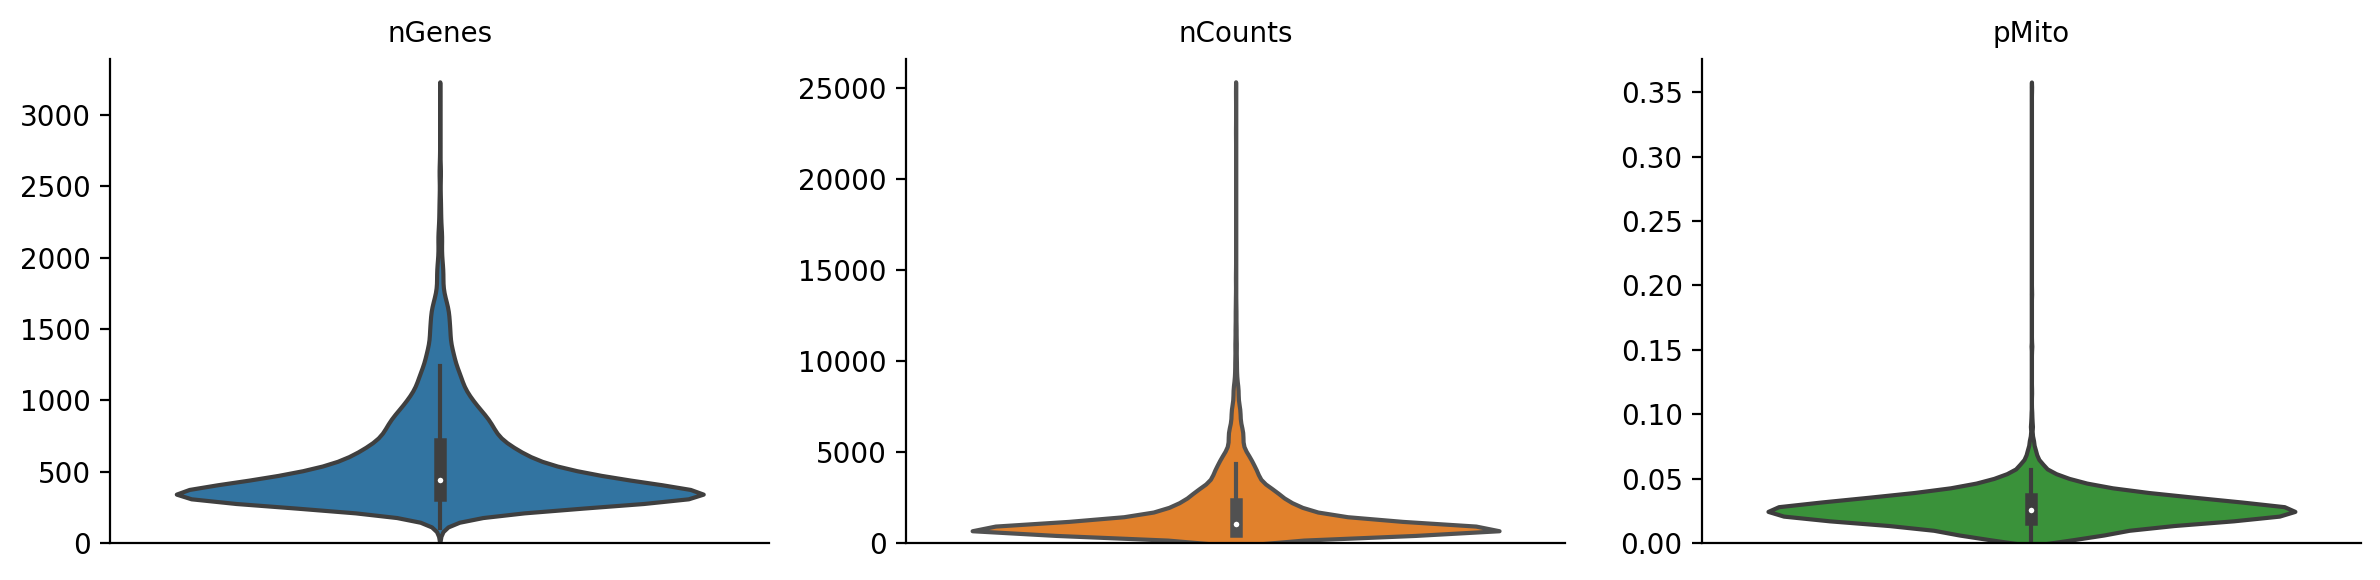

In [134]:
dyn.pl.basic_stats(adata)

In [82]:
dyn.tl.reduceDimension(adata)

|-----> retrive data for non-linear dimension reduction...
|-----> perform umap...
|-----> [dimension_reduction projection] in progress: 100.0000%
|-----> [dimension_reduction projection] finished [56.3064s]


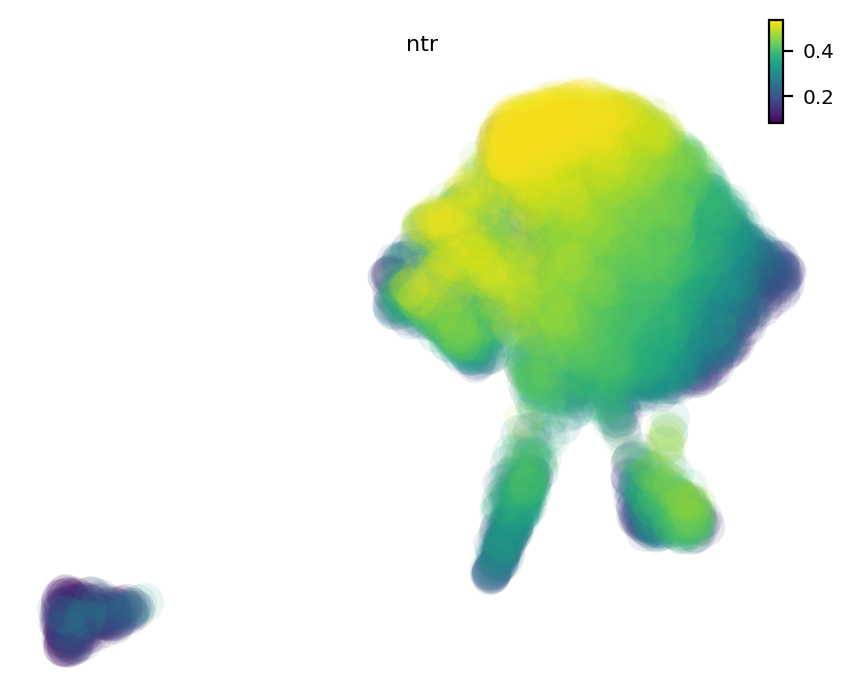

In [84]:
dyn.pl.umap(adata)

In [86]:
dyn.tl.moments(adata)

|-----> calculating first/second moments...
|-----> [moments calculation] in progress: 100.0000%
|-----> [moments calculation] finished [29.7764s]


In [87]:
adata.uns["pp"]["has_splicing"] = False
dyn.tl.dynamics(adata, model="deterministic")

estimating gamma: 100%|██████████| 743/743 [01:25<00:00,  8.73it/s]


AnnData object with n_obs × n_vars = 6387 × 21504
    obs: 'nGenes', 'nCounts', 'pMito', 'label_time', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'umap_fit', 'dynamics'
    obsm: 'X_pca', 'X', 'cell_cycle_scores

In [93]:
pca_genes = adata.var.use_for_pca
new_expr = adata[:, pca_genes].layers["M_n"]
time_3_gamma = adata[:, pca_genes].var.gamma.astype(float)

t = adata.obs.label_time.astype(float)
M_s = adata.layers["M_s"][:, pca_genes]
time_3_cells = adata.obs.label_time == 3

In [95]:
def alpha_minus_gamma_s(new, gamma, t, M_s):
    # equation: alpha = new / (1 - e^{-rt}) * r
    alpha = new.A.T / (1 - np.exp(-gamma.values[:, None] * t.values[None, :])) * gamma.values[:, None]

    gamma_s = gamma.values[:, None] * M_s.A.T
    alpha_minus_gamma_s = alpha - gamma_s
    return alpha_minus_gamma_s

time_3_velocity_n = alpha_minus_gamma_s(new_expr[time_3_cells, :], time_3_gamma, t[time_3_cells], M_s[time_3_cells, :])
velocity_n = adata.layers["velocity_N"].copy()

valid_velocity_n = velocity_n[:, pca_genes].copy()
valid_velocity_n[time_3_cells, :] = time_3_velocity_n.T
velocity_n[:, pca_genes] = valid_velocity_n.copy()

adata.layers["velocity_alpha_minus_gamma_s"] = velocity_n.copy()

In [97]:
dyn.tl.cell_velocities(
    adata,
    enforce=True,
    X=adata.layers["M_t"],
    V=adata.layers["velocity_alpha_minus_gamma_s"],
    method="cosine",
)

|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:pca
|-----> method arg is None, choosing methods automatically...
|-----------> method ball_tree selected
|-----> <insert> connectivities to obsp in AnnData Object.
|-----> <insert> distances to obsp in AnnData Object.
|-----> <insert> neighbors to uns in AnnData Object.
|-----> <insert> neighbors.indices to uns in AnnData Object.
|-----> <insert> neighbors.params to uns in AnnData Object.
|-----> [calculating transition matrix via cosine kernel with sqrt transform.] in progress: 100.0000%
|-----> [calculating transition matrix via cosine kernel with sqrt transform.] finished [1125.5006s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%
|-----> [projecting velocity vector to low dimensional embedding] finished [1.4660s]


AnnData object with n_obs × n_vars = 6387 × 21504
    obs: 'nGenes', 'nCounts', 'pMito', 'label_time', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'umap_fit', 'dynamics', 'grid_velocity_umap'
    obsm: 'X_pca', '

In [98]:
adata

AnnData object with n_obs × n_vars = 6387 × 21504
    obs: 'nGenes', 'nCounts', 'pMito', 'label_time', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'umap_fit', 'dynamics', 'grid_velocity_umap'
    obsm: 'X_pca', '

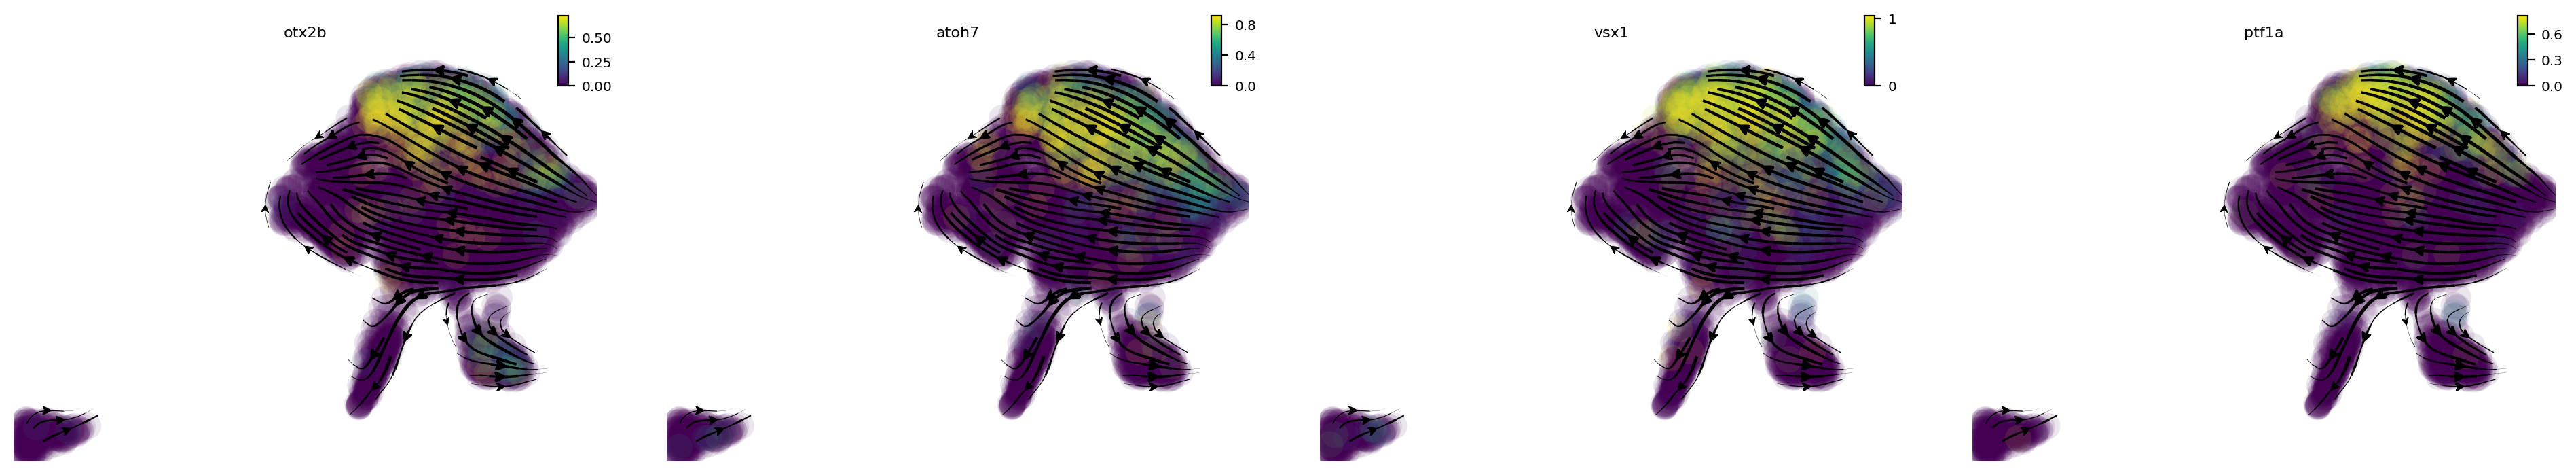

In [100]:
dyn.pl.streamline_plot(
    adata,
    color=["otx2b",  "atoh7", "vsx1", "ptf1a"],
    ncols=4,
    basis="umap",
)

<Figure size 1200x400 with 0 Axes>

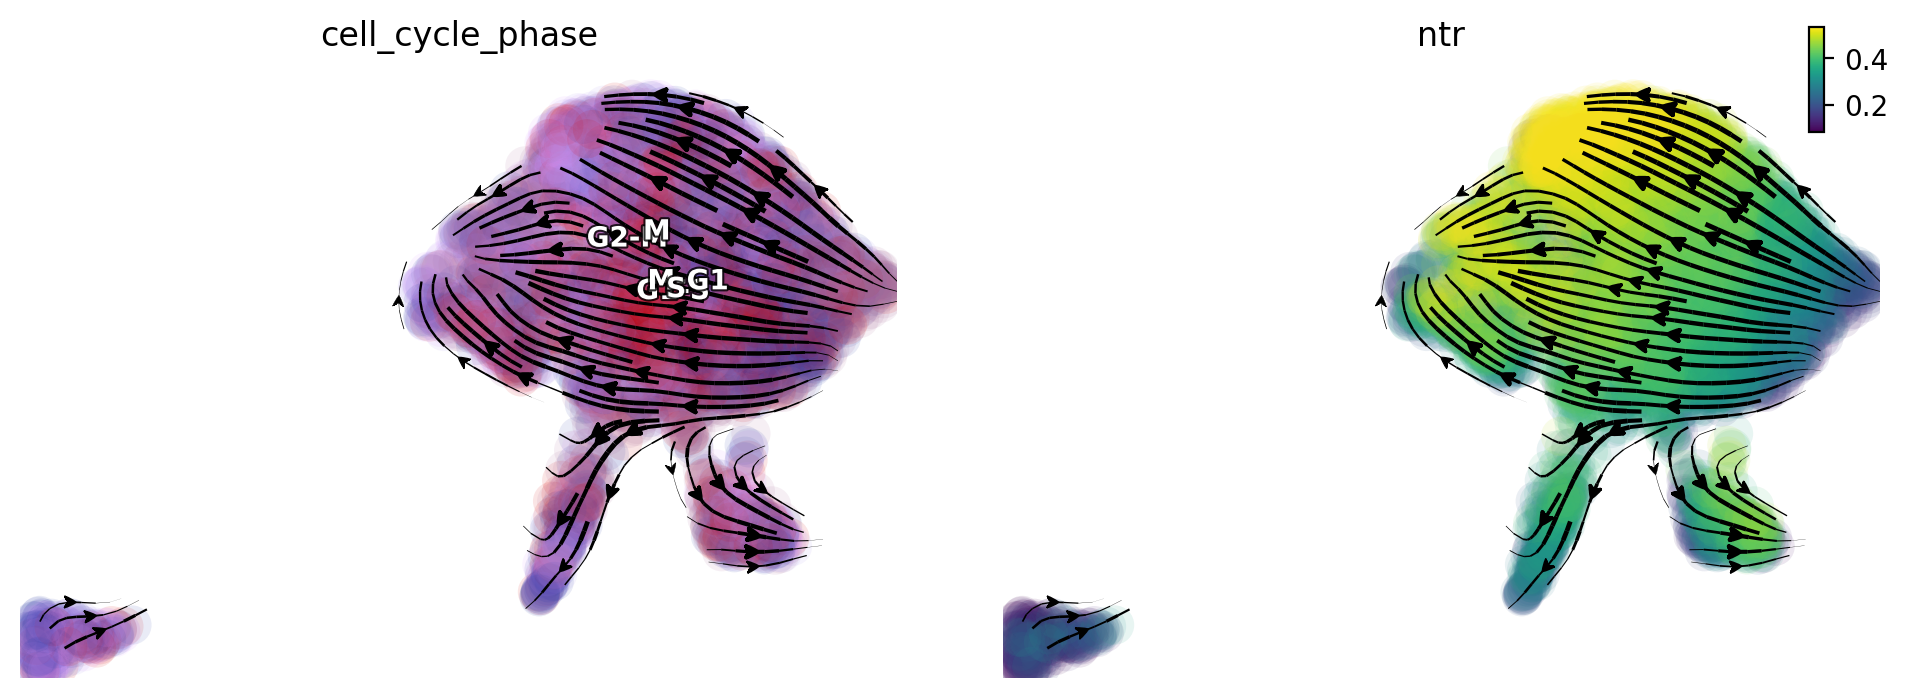

In [103]:
dyn.pl.streamline_plot(adata, color=['cell_cycle_phase','ntr'], basis='umap')

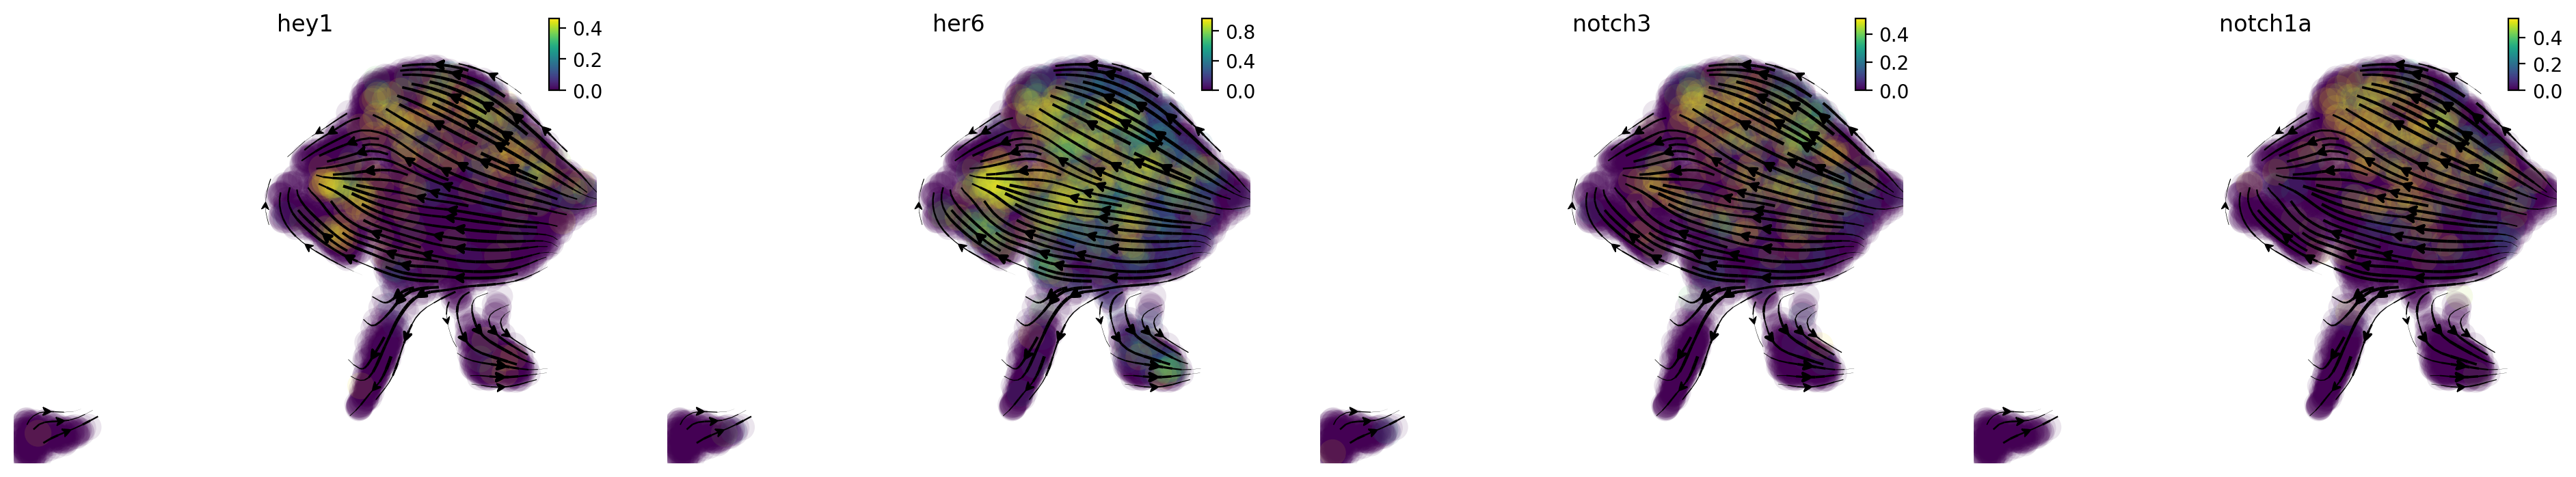

In [112]:
dyn.pl.streamline_plot(
    adata,
    color=["hey1",  "her6", "notch3", "notch1a"],
    ncols=4,
    basis="umap",
)

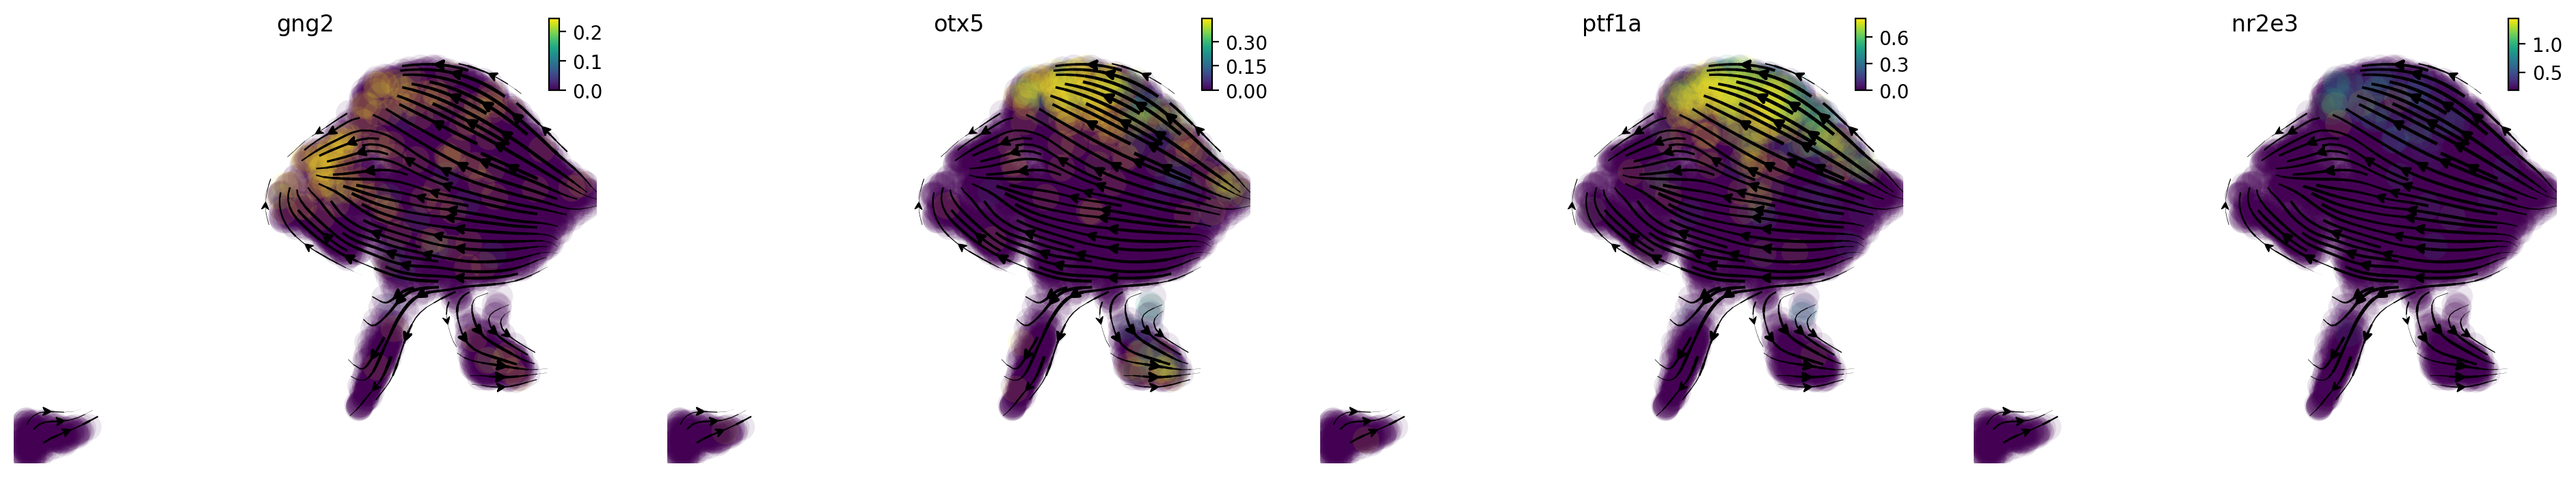

In [113]:
dyn.pl.streamline_plot(
    adata,
    color=["gng2","otx5","ptf1a", "nr2e3"],
    ncols=4,
    basis="umap",
)

In [117]:
dyn.tl.hdbscan(adata, layer="X_total", basis="umap")

|-----> [hdbscan density-based-clustering] in progress: 100.0000%
|-----> [hdbscan density-based-clustering] finished [40.5053s]


In [118]:
adata

AnnData object with n_obs × n_vars = 6387 × 21504
    obs: 'nGenes', 'nCounts', 'pMito', 'label_time', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'hdbscan', 'hdbscan_prob'
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'umap_fit', 'dynamics', 'grid_velocity

In [121]:
adata.obs.hdbscan

barcode
AACACACAGAACGCTAGTACTGGTTCC    1
AACACACAGAACGCTAGTCAGTAAGAG    2
AACACACAGAAGGTGGTAAAGATCTGC    2
AACACACAGACAACAGGTTGACAGCTA    2
AACACACAGACACCAACGCTTGTGCCA    2
                              ..
TGTGGACACTTCGAGGATACTGGTTCC    2
TGTGGACACTTCGAGGATCCATATCTC    2
TGTGGACACTTCGAGGATCTACTATGG    2
TGTGGACACTTGCCGTCACATTCCGCT    2
TGTGGACACTTGGTGACCTTGTCGCTC    2
Name: hdbscan, Length: 6387, dtype: object

In [122]:
dyn.tl.find_group_markers(adata, group="hdbscan", layer="X_total" )

identifying top markers for each group: 743it [00:05, 133.82it/s]
identifying top markers for each group: 743it [00:18, 40.04it/s]
identifying top markers for each group: 743it [00:06, 107.16it/s]
identifying top markers for each group: 743it [00:05, 132.97it/s]
identifying top markers for each group: 743it [00:07, 101.49it/s]
identifying top markers for each group: 743it [00:03, 188.42it/s]


AnnData object with n_obs × n_vars = 6387 × 21504
    obs: 'nGenes', 'nCounts', 'pMito', 'label_time', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'hdbscan', 'hdbscan_prob'
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'umap_fit', 'dynamics', 'grid_velocity

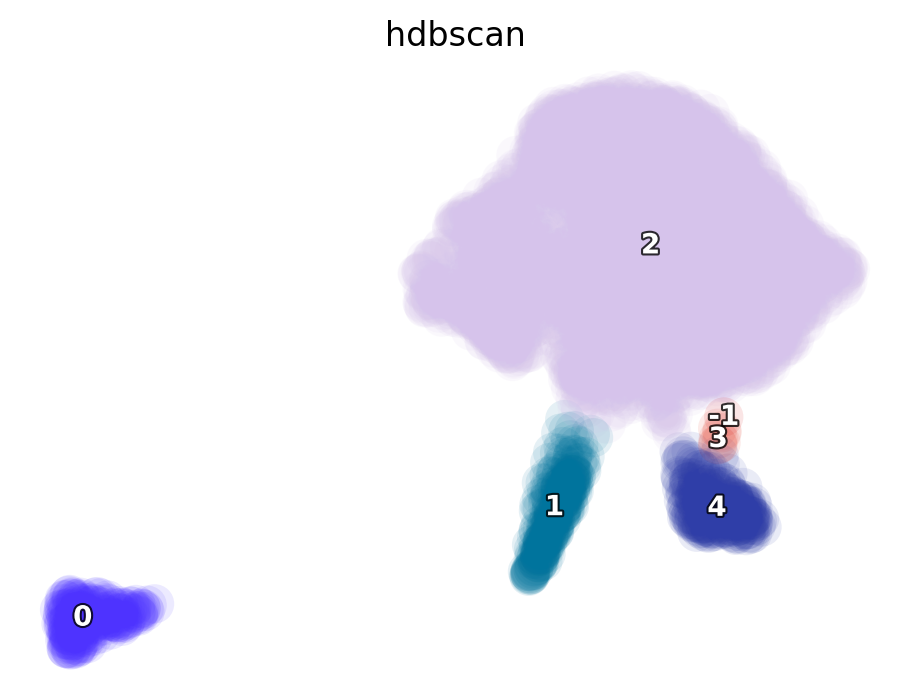

In [123]:
dyn.pl.umap(adata, color="hdbscan")

|-----> [hdbscan density-based-clustering] in progress: 100.0000%
|-----> [hdbscan density-based-clustering] finished [2.1406s]


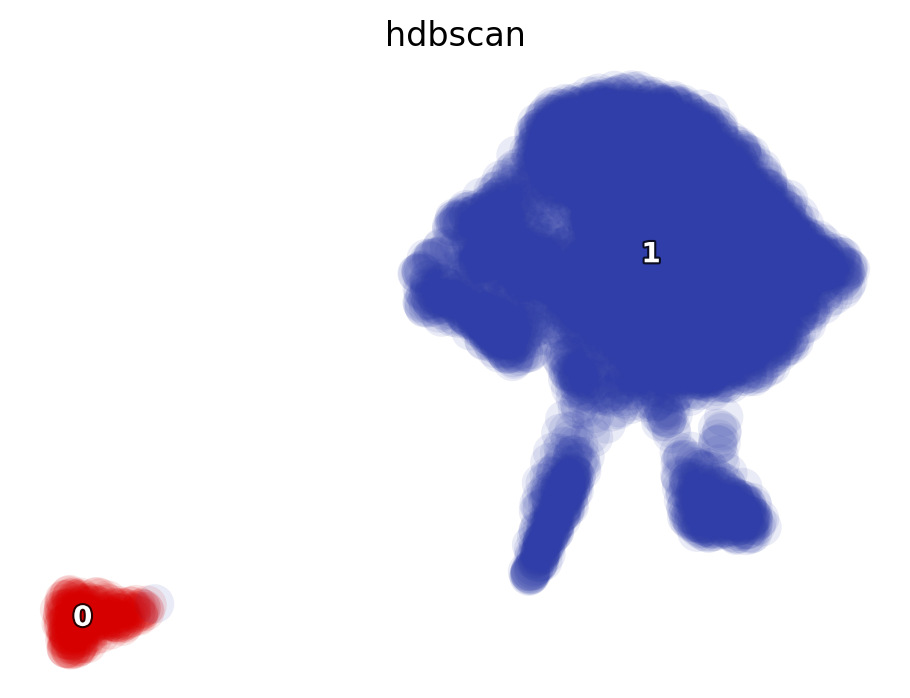

In [124]:
dyn.tl.hdbscan(adata, layer="X_total", basis="pca")
dyn.pl.umap(adata, color="hdbscan")

In [128]:
dyn.tl.leiden(adata, layer="X_total")
adata

AnnData object with n_obs × n_vars = 6387 × 21504
    obs: 'nGenes', 'nCounts', 'pMito', 'label_time', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'hdbscan', 'hdbscan_prob', 'X_total_leiden'
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'umap_fit', 'dynamic

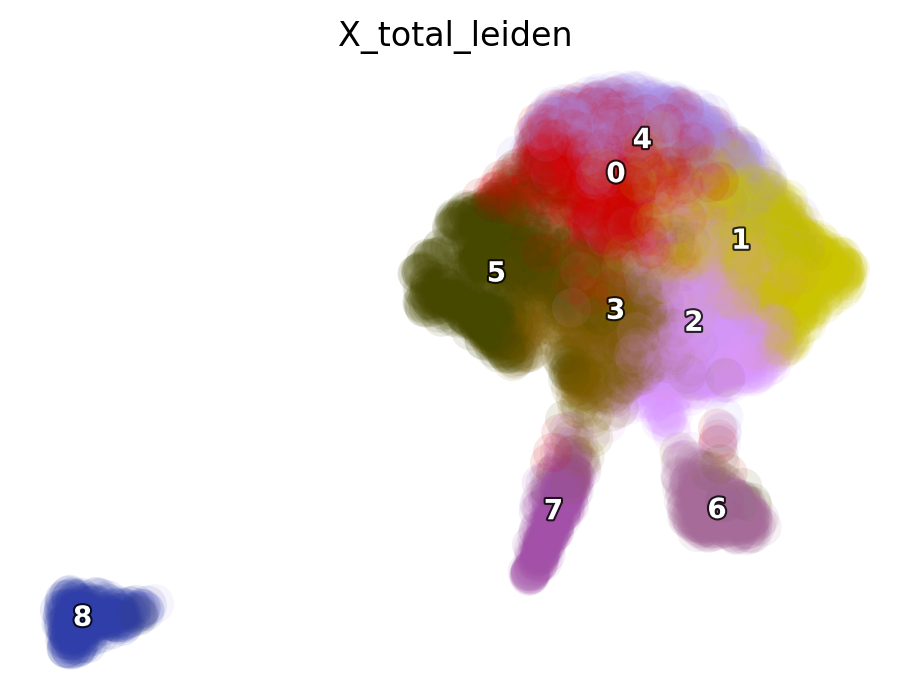

In [129]:
dyn.pl.umap(adata, color="X_total_leiden")

In [130]:
dyn.tl.louvain(adata)
adata

AnnData object with n_obs × n_vars = 6387 × 21504
    obs: 'nGenes', 'nCounts', 'pMito', 'label_time', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'hdbscan', 'hdbscan_prob', 'X_total_leiden', 'louvain'
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'umap_fit

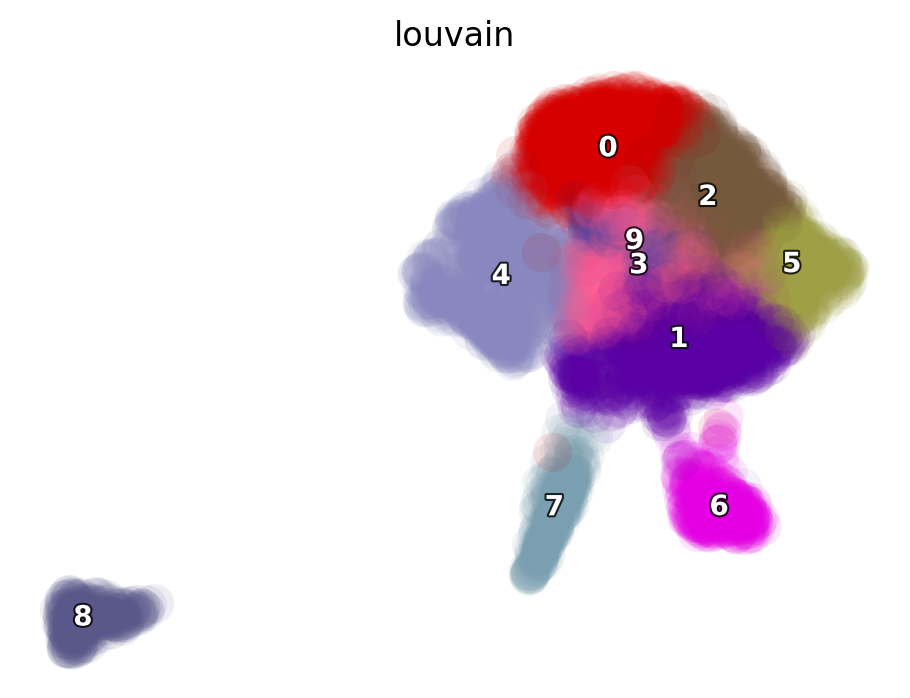

In [131]:
dyn.pl.umap(adata, color="louvain")

In [133]:
dyn.tl.find_group_markers(adata, group="X_total_leiden", layer="X_total" )

identifying top markers for each group: 743it [00:07, 103.25it/s]
identifying top markers for each group: 743it [00:09, 75.53it/s]
identifying top markers for each group: 743it [00:09, 79.86it/s]
identifying top markers for each group: 743it [00:10, 73.60it/s]
identifying top markers for each group: 743it [00:10, 74.25it/s]
identifying top markers for each group: 743it [00:09, 80.84it/s]
identifying top markers for each group: 743it [00:09, 75.09it/s]
identifying top markers for each group: 743it [00:08, 83.45it/s]
identifying top markers for each group: 743it [00:07, 93.16it/s] 


AnnData object with n_obs × n_vars = 6387 × 21504
    obs: 'nGenes', 'nCounts', 'pMito', 'label_time', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'ntr', 'cell_cycle_phase', 'hdbscan', 'hdbscan_prob', 'X_total_leiden', 'louvain'
    var: 'gene_name', 'query', 'scopes', '_id', '_score', 'symbol', 'notfound', 'nCells', 'nCounts', 'pass_basic_filter', 'score', 'log_cv', 'log_m', 'frac', 'use_for_pca', 'ntr', 'alpha', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'beta_k', 'gamma_k', 'use_for_dynamics'
    uns: 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'umap_fit